# <span style="color:black"> Esercitazioni - lezione 9 </span>

## <span style="color:black"> Esercizio 09.1 </span>

L'esercitazione consiste nel risolvere il problema del commesso viaggiatore: dato un insieme di *N* città, trovare il percorso ottimale per visitarle tutte una e una sola volta, ritornando alla fine al punto di partenza. Il percorso ottimale è inoltre quello che, soddisfando questi vincoli, minimizza la lunghezza del tragitto.  
L'algoritmo è stato scritto seguendo le linee guida fornite, in particolare seguendo i passaggi illustrati a breve.

La sturttura base del programma è molto semplice:
* Una funzione di inizializzazione che legga i parametri di input da un file e generi, secondo tali indicazioni, l'insieme delle città e una prima popolazione di cammini possibili che soddisfino i vincoli esposti sopra.
* Una funzione di check per verificare che ogni percorso soddisfi i vincoli richiesti
* Un ciclo lungo *ngenerations*, all'interno del quale, per ogni "generazione":
    * viene salvato il migliore cammino trovato al posto del peggiore
    * vengono effettuate delle mutazioni sugli elementi della popolazione
    * vengono ordinati gli elementi della popolazione dal "migliore" al "peggiore"
    * si stampano le osservabili relative all'attuale popolazione 
    * viene generata la successiva "generazione" di individui che costituisce una nuova popolazione con la quale si ricomincia il ciclo
    
Entrando nello specifico queste istruzioni sono state implemenentate come segue:  

### Inizializzazione
Nella funzione di inizializzazione si sono innanzitutto letti i semi per il generatore di numeri casuali da un file apposito.
A questo punto vengono letti i parametri di input passati attraverso il file *"input.dat"* tra i quali vi sono:
* numero di città da visitare (*ncities*): sono state di norma effettuate simulazioni - come richiesto - con 30 città. Tuttavia sporadiche simulazioni con un numero maggiore di città (per esempio 100) hanno evidenziato comunque la convergenza dell'algoritmo al percorso migliore a patto di aumentare sufficientemente il numero di generazioni.
* numero di generazioni per cui iterare le istruzioni: verrà discusso in seguito il numero minimo necessario per la convergenza dell'algoritmo, ad ogni modo sono state effettuate simulazioni con 1000 generazioni
* disposizione delle città: consiste in un numero intero identificativo della geometria e un numero rappresentante la scala del problema
* probabilità di subire determinate mutazioni: sono state implementate 5 mutazioni (spiegate dettagliatamente in seguito), di conseguenza ad ognuna di esse viene attribuita una diversa probabilità
* probabilità di eseguire un crossover nella generazione di una nuova popolazione

Una volta caricati i parametri di input viene generato l'insieme delle città.  

**Generazione delle posizioni**  
Sono state implementate 2 configurazioni particolari per generare la posizione delle città, corrispondenti ai numeri identificativi 1 e 2.
1. Città disposte in modo casuale su una circonferenza, per cui il numero di scala corrisponde al raggio $r$: viene generato un numero casuale $x\in[-r,r]$, e quindi la corrispondente $y=\pm\sqrt{r^2-x^2}$.
2. Città disposte all'interno di un quadrato, per cui il numero di scala corrisponde alla metà del lato: vengono semplicemente generati due numeri casuali $x,y\in[-r,r]$.

**Generazione della popolazione iniziale**  
A questo punto è stata generata la popolazione iniziale. La dimensione del vettore della popolazione è fissata a *ncities*\**ncities*, e ogni elemento corrisponde ad una sequenza di numeri identificativa dell'ordine con cui vengono visitate le città (ad ogni città è associato un numero intero). La popolazione è stata quindi ottenuta riempiendo tutti i vettori secondo un ordinamento crescente da 1 a *ncities* e successivamente effettuando su ciascuno rimescolamenti casuali che potessero interessare tutti gli elementi del vettore.  
Si noti che con questo metodo di generazione della popolazione non si corre il rischio di uscire dai vincoli richiesti e visitare più volte una città a scapito di un'altra. E' invece possibile che, malauguratamente, compaia più volte uno stesso percorso, tuttavia questo non rappresenta in nessun modo un ostacolo per il buon funzionamento del codice.

### Funzione di check  
Questa funzione è stata implementata per verificare che tutti gli elementi della popolazione soddisfino i vincoli richiesti. In particolare può essere invocata ogni volta che venga generato o mutato un elemento della popolazione per verificare che nel vettore corrispondente all'elemento modificato non siano presenti ripetizioni.  
Dato il significativo costo computazionale di questa funzione, e le scelte effettuate per generazione e mutazione di individui (che non rischiano mai di generare due città uguali in un elemento della popolazione), si è scelto di disabilitare questa funzione una volta verificato il corretto comportamento del codice.

### Best value
A questo punto è possibile entrare nel ciclo la cui prima operazione, come già accennato, consiste nella sostituzione del "peggiore" elemento della popolazione con il "migliore" elemento assoluto, ovvero l'elemento che finora ha presentato la minore lunghezza del percorso. Questa operazione si è rivelata fondamentale per la convergenza dell'algoritmo, e si è scelto di effettuarla ad ogni step del ciclo. A differenza di quanto si potrebbe obiettare questo non induce necessariamente ad una caduta in un minimo locale in quanto la frequente possibilità di mutazione o di crossing scongiura questa ipotesi.

### Mutazioni  
Una volta generata una buona (nel senso che soddisfi i vincoli) popolazione, si può procedere ad effettuare alcune mutazioni, volte al migliorare la popolazione stessa. Le operazioni che verranno ora presentate vengono iterate un numero di volte pari alla metà degli elementi di cui è composta la popolazione.

**Scelta dell'elemento**  
Viene scelto un elemento su cui provare ad effettuare una mutazione. L'idea è quella di scegliere più frequentemente gli elementi "peggiori", e lasciare più inalterati i migliori, in modo che, con il susseguirsi delle generazioni, la popolazione tenda sempre a migliorare piuttosto che a peggiorare. Ricordando che una volta per ogni generazione viene effettuata un'operazione di ordinamento, la scelta avviene nel seguente modo: viene generato un numero $r$ gaussianamente distribuito con media $\mu=0$ e varianza $\sigma=\frac{n_{elements}}{2}$ (dove $n_{elements}$ indica il numero di elementi in una popolazione). Se ne è preso il negativo del valore assoluto e lo si è sommato per la dimensione della popolazione: $-|r|+n_{elements}$. Effettuando un controllo che il numero scelto non sia negativo (cosa che potrebbe succedere circa nel 5% dei casi) si ottiene la distribuzione desiderata.

<table border="0">
<tr><td> <img src="images/r.png"> </td><td> <img src="images/modr.png"> </td><td>  <img src="images/-modr.png"> </td><td> <img src="images/-modr+n.png"> </td></tr>
</table>

Nell'immagine riportata è rappresentata come varia la distribuzione di probabilità con i vari passaggi (nell'mmagine si è posto per comodità $\frac{n_{elements}}{2}=1$)

Una volta scelto l'elemento, questo viene sottoposto alla possibilittà di mutazione: date le probabilità di mutazione $p_m^{(i)}$ con $i=1,...,5$, per ogni mutazione viene estratto uniformemente $r\in[0,1]$, e se $r<p_m^{(i)}$, allora viene invocata la mutazione i-esima.

**Mutazione 1**  
La mutazione 1 consiste nel semplice scambio di due città estratte casualmente secondo una distribuzione uniforme. La probabilità di questa mutazione $p_m^{(1)}$ è stata posta a 0.1 .

**Mutazione 2**  
La mutazione 2 consiste nella traslazione rigida della sequenza delle città di un numero casuale di posizioni. Di fatto questa mutazione non incide sulla lunghezza del tragitto ma sulla città di arrivo e di partenza. L'implementazione di questa mutazione permette di evitare di scrivere apposite condizioni periodiche al contorno, a patto di mantenere una probabilità alta per l'avvenimento di questa mutazione. Per questo è stata posta $p_m^{(2)}=0.9$ .

**Mutazione 3**  
La mutazione 3 consiste nella traslazione rigida di *m* città contigue di *n* posti. Questa mutazione avviene per scambi successivi di città fino al raggiungimento della condizione finale. I valori *n* e *m* sono estratti da una distribuzione uniforme con il vincolo che *n,m* $\in[1,\frac{N}{2}]$ e la posizione iniziale (*st*) delle città da scambiare è stata generata uniformemente tra 0 e $\frac{N}{2}-$*n*. Questo assicura che la mutazione non ecceda mai gli estremi del vettore. L'ergodicità è comunque garantita dalla mutazione 2. La probabilità è fissata a $p_m^{(3)}=0.1$ .

**Mutazione 4**  
La mutazione 4 consiste nella permutazione di due gruppi composti da *n* città e distanti *m* città. Come per la mutazione precedente i valori di *n*, *m*, e *st* (valore che indica dove inizia il primo gruppo di città) sono stati scelti in modo da non eccedere i limiti del vettore. Anche questa probabilità è posta a $p_m^{(4)}=0.1$ .

**Mutazione 5**  
L'ultima mutazione consiste nell'inversione dell'ordine di un numero *n* di città contigue. Questa mutazione risulta fondamentale per uscire da situazioni di minimo locale in cui una porzione di percorso è ottimizzata a "compartimento stagno" ma nella direzione opposta rispetto al percorso migliore individuato dalle altre città. Per questo motivo la probabilità di questa mutazione è elevata: $p_m^{(5)}=0.3$ .

Si è verificato che queste 5 mutazioni sono sufficienti alla convergenza dell'algoritmo, senza la necessità di implementare il crossover (che tuttavia ne aumenta la velocità di convergenza).

### Ordinamento
Finora si è parlato degli elementi della popolazione giudicandone alcuni "migliori" e altri "peggiori". Come accennato questo la "bontà" di un percorso è proporzionale alla lunghezza del tragitto che unisce le città secondo quel percorso. Per valutare quindi la "bontà" di un elemento della popolazione è stata introdotta una funzione, detta ***funzione costo*** in base alla quale sia possibile ordinare la popolazione a partire dall'elemento che presenta il tragitto più breve (il cosidetto "migliore") fino a quello che presenta il tragitto più lungo (il "peggiore"). La funzione costo utilizzata è la somma in quadratura delle distanze tra città successive:
$$  L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2  $$  
Data questa funzione costo è stato così possibile scrivere una funzione di ordinamento, al termine della quale viene salvato il miglior elemento della popolazione solo qualora esso sia migliore del miglior elemento finora trovato. 

### Output  
Terminato l'ordinamento vi è una stampa dei risultati parziali, che avviene su 4 file di output: 
- sul file *"config.partial"* viene salvata l'intera popolazione ordinata con i relativo valore della funzione costo
- il file *"position.0"* salva le coordinate delle città ordinate secondo il miglior elemento del vettore
- sul file *"output.lbest.0"* viene scritta la generazione attuale con il relativo valore della funzione costo
- sul file *"output.lave.0"* viene salvata, oltre al numero della generazione attuale, la media dei valori della funzione costo per la prima metà della popolazione (la metà migliore).

### Nuova generazione
Alla fine di ogni ciclo viene generata una nuova popolazione a partire dalla precedente. In particolare vengono selezionati due elementi chiamati padre e madre analogamente a quanto fatto per selezionare l'elemento soggetto a mutazione; a differenza di prima però qui la gaussiana viene centrata sui primi elementi della popolazione, in modo che la generazione successiva si figlia dei migliori elementi di quella precedente. Anche qui la distribuzione seguita per questo procedimento è una gaussiana con media nulla e varianza $\sigma=\frac{n_{elements}}{2}$.  
Una volta selezionati padre e madre, si estrae un numero $r$ da una distribuzione uniforme: qualora $r$ sia maggiore o uguale alla probabilità di crossover $p_{cr}$ (caricata da file di input) i figli saranno semplicementi uguali ai genitori, altrimenti verrà eseguito un crossover, e gli elementi risultanti saranno i figli. Ripetendo questa operazione $\frac{n_{elements}}{2}$ volte, si otterranno $n_{elements}$ coppie di figli che costituiranno la nuova generazione.

**Crossover**  
L'operazione di crossover consiste nell'incrocio di due elementi genitori, padre e madre, a formare due elementi figli. Questo è fatto andando ad estrarre un numero $r$ uniforme tra $0$ e $n_{cities}$: i due vettori figli avranno le città tra la $0$ e la $r$ invariate rispetto ai genitori, mentre le ultime $(n_{cities}-r)$ città saranno attribuite ad ogni figlio seguendo l'ordine in cui esse compaiono nel genitore da cui il figlio stesso non ha ereditato la prima parte di città.  
La probabilità di crossover è stata fissata a $p_{cr}=0.1$ .

### Risultati
I risultati delle simulazioni sono riportati nei grafici sottostanti, in cui viene mostrato rispettivamente il migliore cammino trovato, l'andamento della funzione costo per la migliore metà della popolazione e quello per il migliore elemento della popolazione, al variare del numero di generazioni.

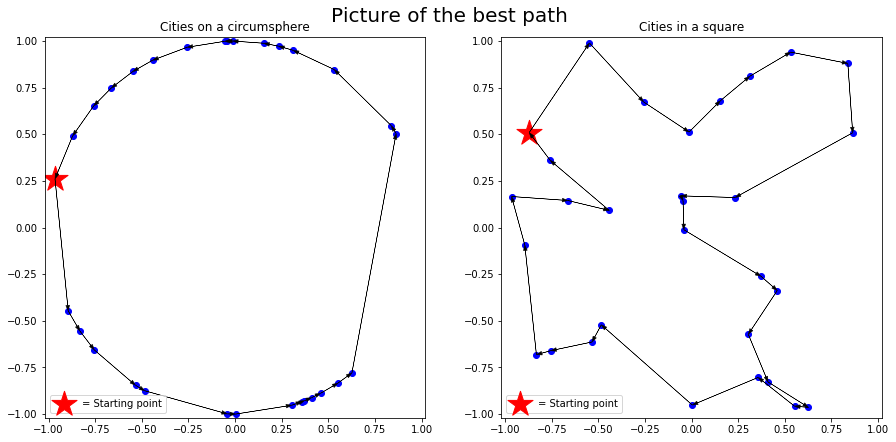

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Picture of the best path', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
x, y = np.loadtxt('circle/position.0', usecols=(0,1), unpack=True)
for i in range(len(x)):
    if i==0:
        plt.scatter(x[i],y[i], marker='*', s=700, color='red', label='= Starting point')
    else:
        plt.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        plt.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
plt.xlim(-1.02,1.02)
plt.ylim(-1.02,1.02)
ax.legend(loc='lower left')
plt.title('Cities on a circumsphere')

ax2 = fig.add_subplot(gs[0,1])
x, y = np.loadtxt('square/position.0', usecols=(0,1), unpack=True)
for i in range(len(x)):
    if i==0:
        plt.scatter(x[i],y[i], marker='*', s=700, color='red', label='= Starting point')
    else:
        plt.scatter(x[i],y[i], color='blue')
    if i<len(x)-1:
        plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
    else:
        plt.arrow(x[i], y[i], x[0]-x[i], y[0]-y[i], width=0, head_width=0.02,length_includes_head=True, lw=0.5, fc="black", ec='black')
plt.xlim(-1.02,1.02)
plt.ylim(-1.02,1.02)
ax2.legend(loc='lower left')
plt.title('Cities in a square')

plt.show()

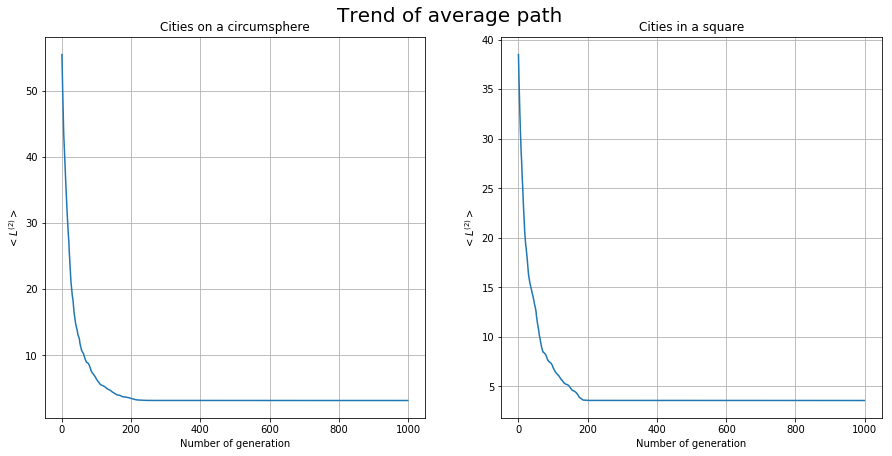

In [40]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Trend of average path', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
igen, Lave = np.loadtxt('circle/output.lave.0', usecols=(0,1), unpack='true')
plt.plot(igen, Lave);
plt.xlabel('Number of generation')
plt.ylabel(r'$<L^{(2)}>$')
plt.grid()
plt.title('Cities on a circumsphere')

ax2 = fig.add_subplot(gs[0,1])
igen, Lave = np.loadtxt('square/output.lave.0', usecols=(0,1), unpack='true')
plt.plot(igen, Lave);
plt.xlabel('Number of generation')
plt.ylabel(r'$<L^{(2)}>$')
plt.grid()
plt.title('Cities in a square')

plt.show()

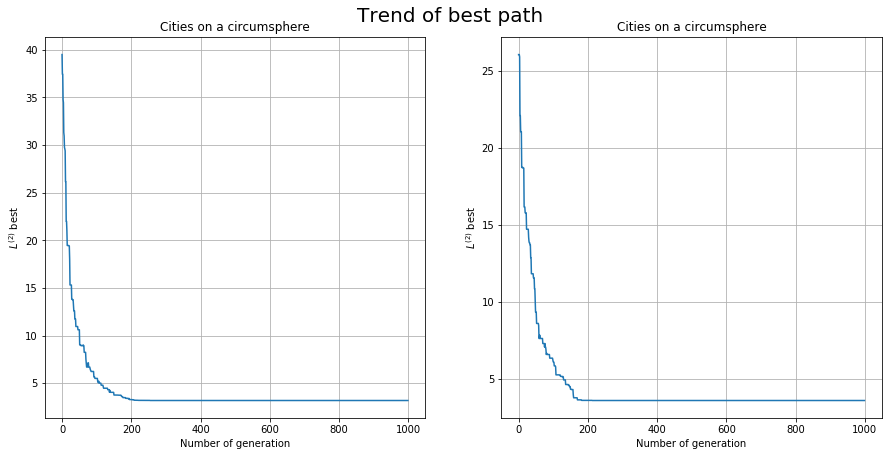

Lenght of best path for cities on a circumsphere is 3.18637
Lenght of best path for cities in a square is 3.5776


In [41]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Trend of best path', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
igen, Lbest = np.loadtxt('circle/output.lbest.0', usecols=(0,1), unpack='true')
plt.plot(igen, Lbest);
plt.xlabel('Number of generation')
plt.ylabel(r'$L^{(2)}$ best')
plt.grid()
plt.title('Cities on a circumsphere')

ax2 = fig.add_subplot(gs[0,1])
igen1, Lbest1 = np.loadtxt('square/output.lbest.0', usecols=(0,1), unpack='true')
plt.plot(igen1, Lbest1);
plt.xlabel('Number of generation')
plt.ylabel(r'$L^{(2)}$ best')
plt.grid()
plt.title('Cities on a circumsphere')

plt.show()

print('Lenght of best path for cities on a circumsphere is '+str(Lbest[-1]))
print('Lenght of best path for cities in a square is '+str(Lbest1[-1]))

Da quest'ultimo grafico si nota che per le condizioni scelte, già un numero di generazioni pari a 200 avrebbe condotto al risultato migliore. Dall'immagine del migliore percorso si evince che non si è caduti in un minimo locale ma effettivamente il percorso trovato è il migliore possibile, e qui si nota che la lunghezza del percorso non diminuisce mai nelle ultime 800 generazioni in quanto non eisteva nessun percorso migliore.